<a href="https://colab.research.google.com/github/Olavo-DataScientist/MNIST-Keras-TF/blob/main/MNIST_with_Keras_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.layers import Input

# Define the model with an explicit Input layer
model = Sequential([
    Input(shape=(28, 28)),          # Input layer to define input shape
    Flatten(),                      # Flatten the input images
    Dense(128, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8723 - loss: 0.4666 - val_accuracy: 0.9569 - val_loss: 0.1508
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9612 - loss: 0.1344 - val_accuracy: 0.9666 - val_loss: 0.1154
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9753 - loss: 0.0876 - val_accuracy: 0.9724 - val_loss: 0.0920
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9808 - loss: 0.0604 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0456 - val_accuracy: 0.9731 - val_loss: 0.0943


In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0985

Test accuracy: 0.9753


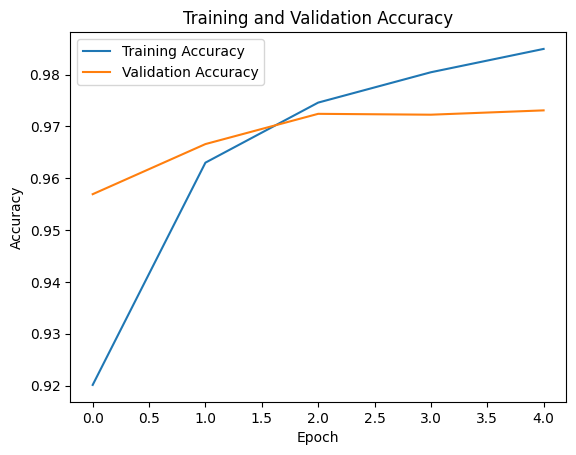

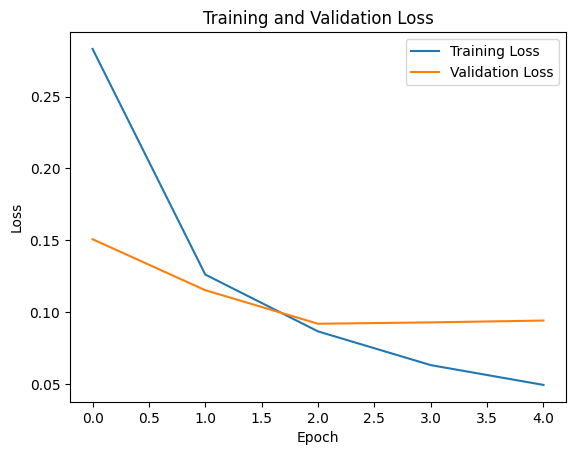

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [7]:
import numpy as np

# Predict the first 5 test images
predictions = model.predict(test_images[:25])

# Show predictions and actual labels
for i in range(25):
    print(f'Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(test_labels[i])}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 0, Actual: 0
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 7, Actual: 7
Predicted: 3, Actual: 3
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 4, Actual: 4


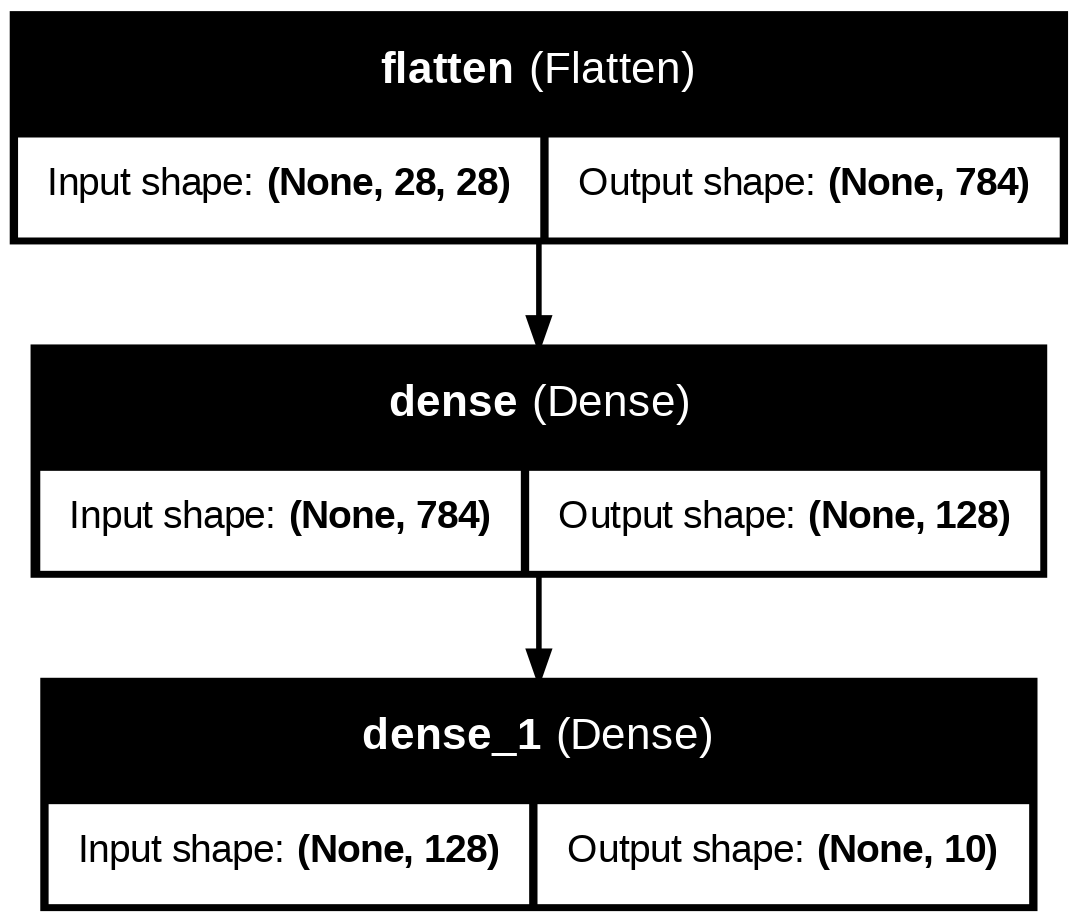

In [9]:
from tensorflow.keras.utils import plot_model

# Save the plot to a file and display it
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)
